# Bangalore house price prediction

# import Libraries

In [925]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge

In [926]:
df1 = pd.read_csv('/Users/sasikumar/anu/Project2/Bengaluru_House_Data.csv',encoding='latin1')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [927]:
df1.shape


(13320, 9)

In [928]:
df1.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [929]:
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

<Axes: >

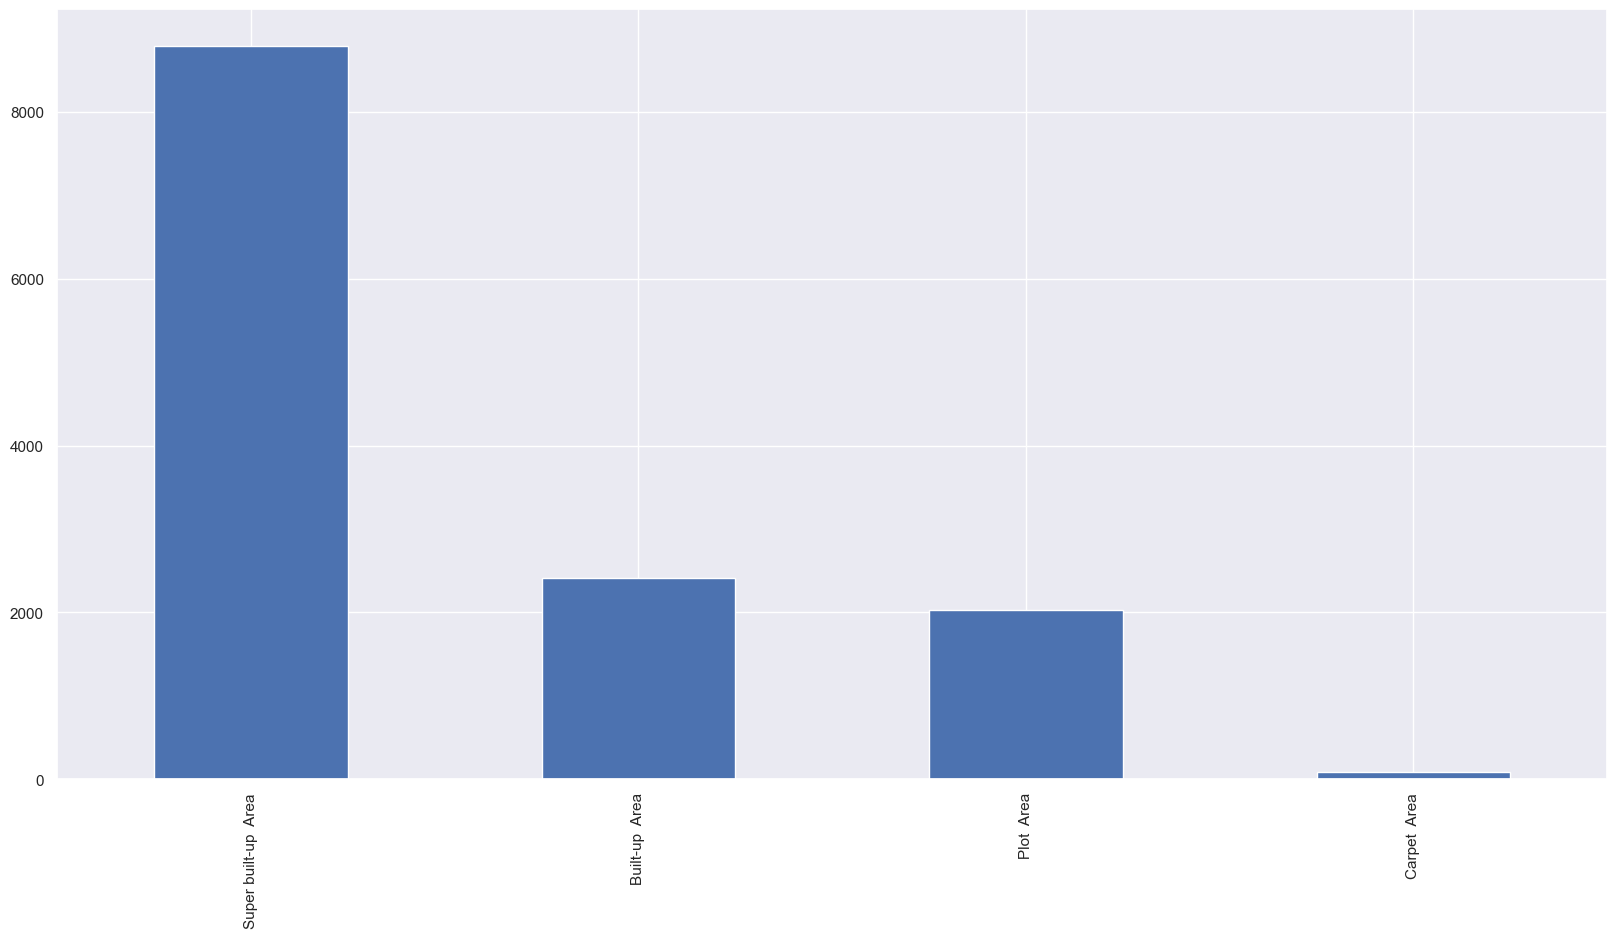

In [930]:
df1.area_type.value_counts().plot(kind='bar')

In [931]:
df1['area_type'].value_counts()


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<Axes: >

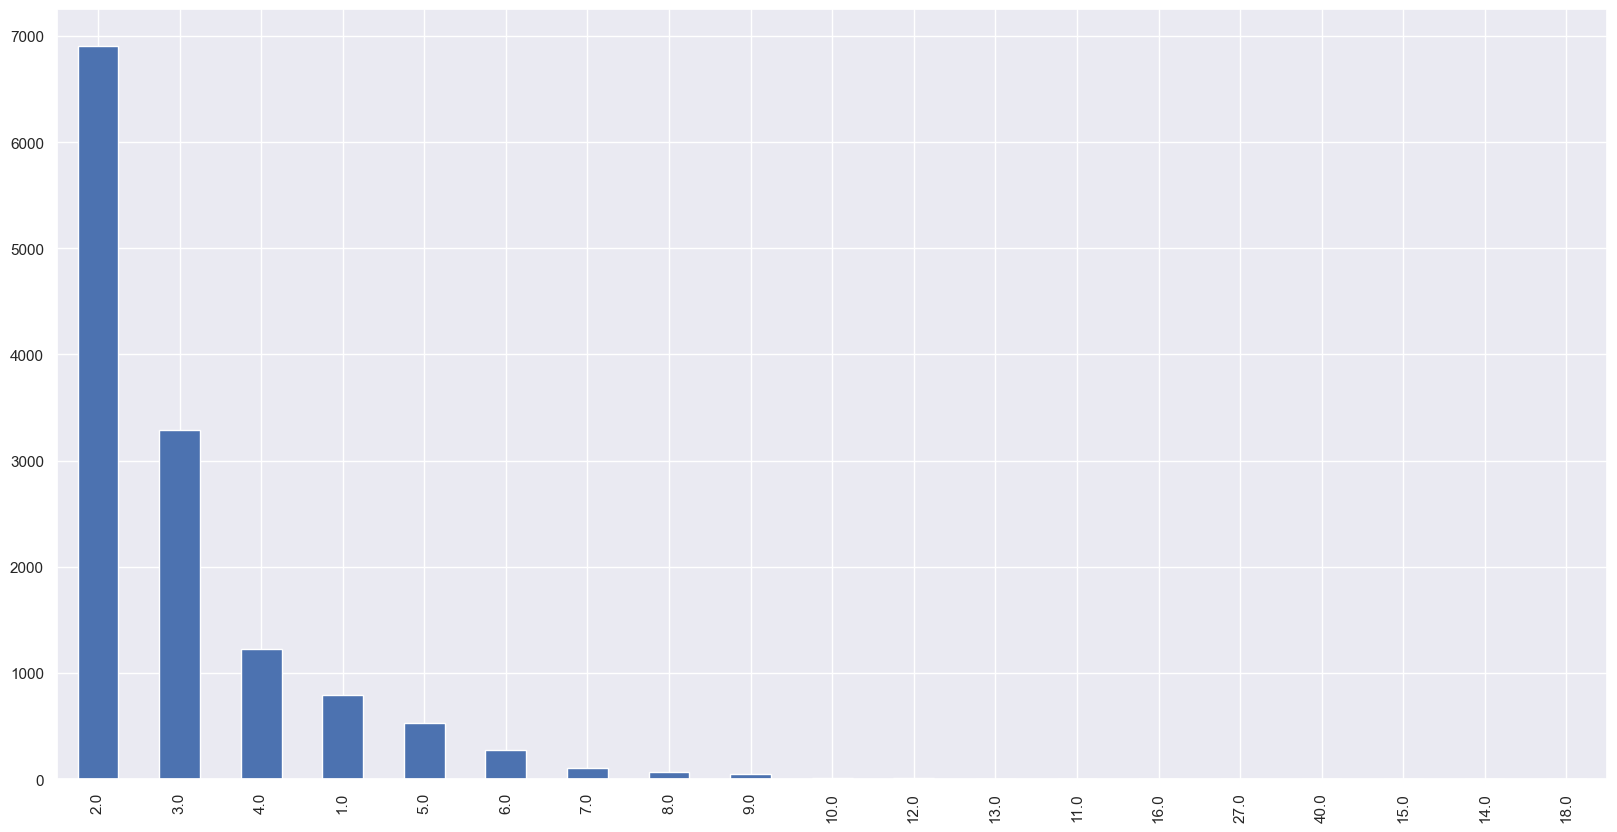

In [932]:
df1.bath.value_counts().plot(kind='bar')

<Axes: >

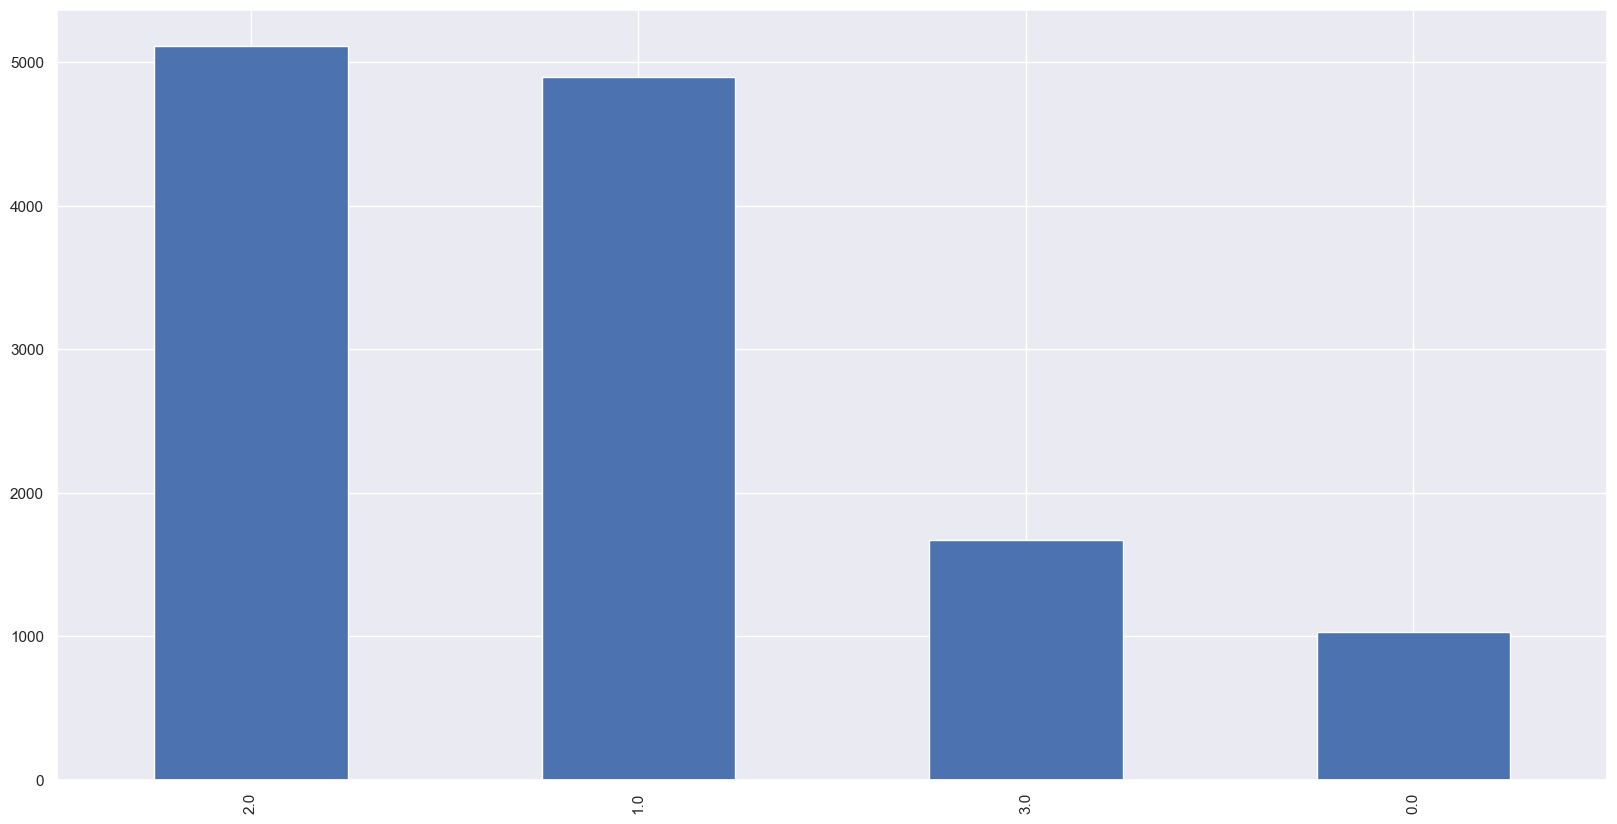

In [933]:
df1.balcony.value_counts().plot(kind='bar')

In [ ]:
#Handling Null Values

In [934]:
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.shape

(13320, 6)

In [935]:
df2.isnull().sum()


location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [936]:
df2.shape


(13320, 6)

In [937]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [938]:
mode_loc = df2['location'].mode()[0]  
df2['location'].fillna(mode_loc, inplace=True)  # Replace missing values with mode value

In [939]:
mode_size = df2['size'].mode()[0]  
df2['size'].fillna(mode_size, inplace=True)

In [940]:
df2['bath']=df2['bath'].fillna(df2['bath'].median())

In [941]:
df2['balcony']=df2['balcony'].fillna(df2['balcony'].median())

In [942]:
df3=df2.copy()
df3.shape

(13320, 6)

In [943]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [944]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [945]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [946]:
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,? 224.50,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,? 477.00,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,? 54.01,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,? 43.49,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,? 56.80,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,? 74.82,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.5,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.77,2


In [947]:
df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [948]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        if 'Sq. Meter' in x:
            x = x.replace('Sq. Meter','')
            return float(x)*10.7639
        elif 'Acres' in x:
            x = x.replace('Acres','')
            return float(x)*43560
        elif 'Guntha' in x:
            x = x.replace('Guntha','')
            return float(x)*1089
        elif 'Sq. Yards' in x:
            x = x.replace('Sq. Yards','')
            return float(x)*9

In [949]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,$120.00,4


In [951]:
df4['price'] = df4['price'].apply(lambda x: x.translate({ord(c): None for c in '$?\x80'}))
df4.head(10)
df4.price = df4.price.apply(convert_sqft_to_num)
df4 = df4[df4.price.notnull()]

In [952]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()



,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [953]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats



count    1.331600e+04
mean     7.970886e+03
std      1.065537e+05
min      2.257423e+00
25%      4.262295e+03
50%      5.428571e+03
75%      7.313162e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [954]:
#location

In [955]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [956]:
location_stats.values.sum()


13316

In [957]:
len(location_stats[location_stats<=20])


1150

In [958]:
location_less_than_10 =location_stats[location_stats<=20]
location_less_than_10

HBR Layout                        20
Sanjay nagar                      20
Poorna Pragna Layout              20
Yelachenahalli                    20
Kaggalipura                       19
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1150, dtype: int64

In [959]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [960]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [961]:
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [962]:
df5.duplicated().sum()


910

In [963]:
df51=df5.drop_duplicates()

In [964]:
df51[df51['total_sqft']/df51['bhk']<300]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13277,other,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091


In [965]:
#outlier

<Axes: xlabel='bhk'>

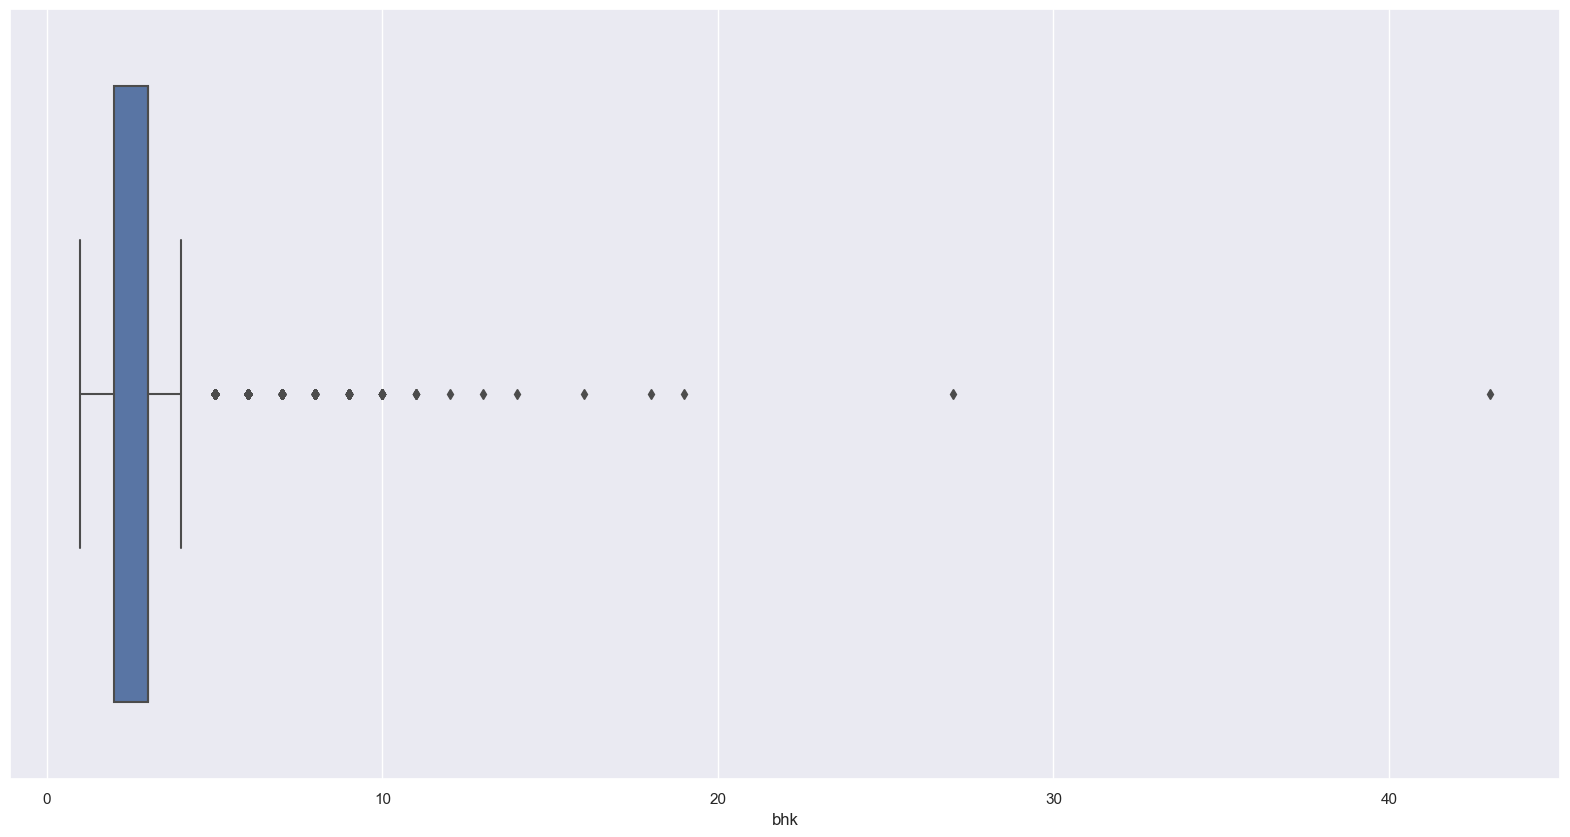

In [966]:
sns.boxplot(x='bhk', data=df51)


<Axes: xlabel='price_per_sqft'>

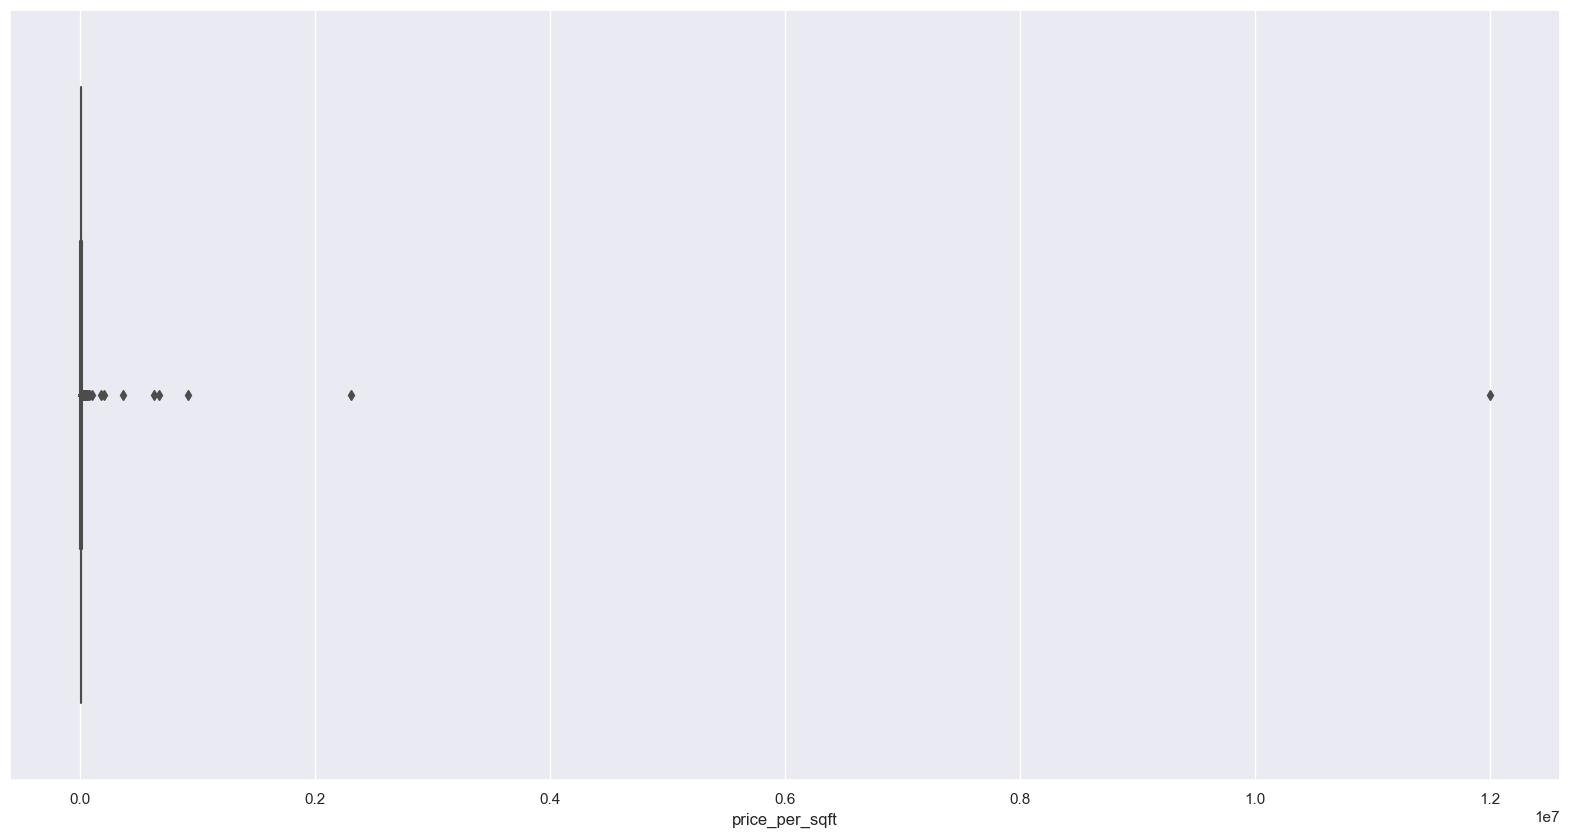

In [967]:
sns.boxplot(x='price_per_sqft', data=df51)


<Axes: xlabel='balcony'>

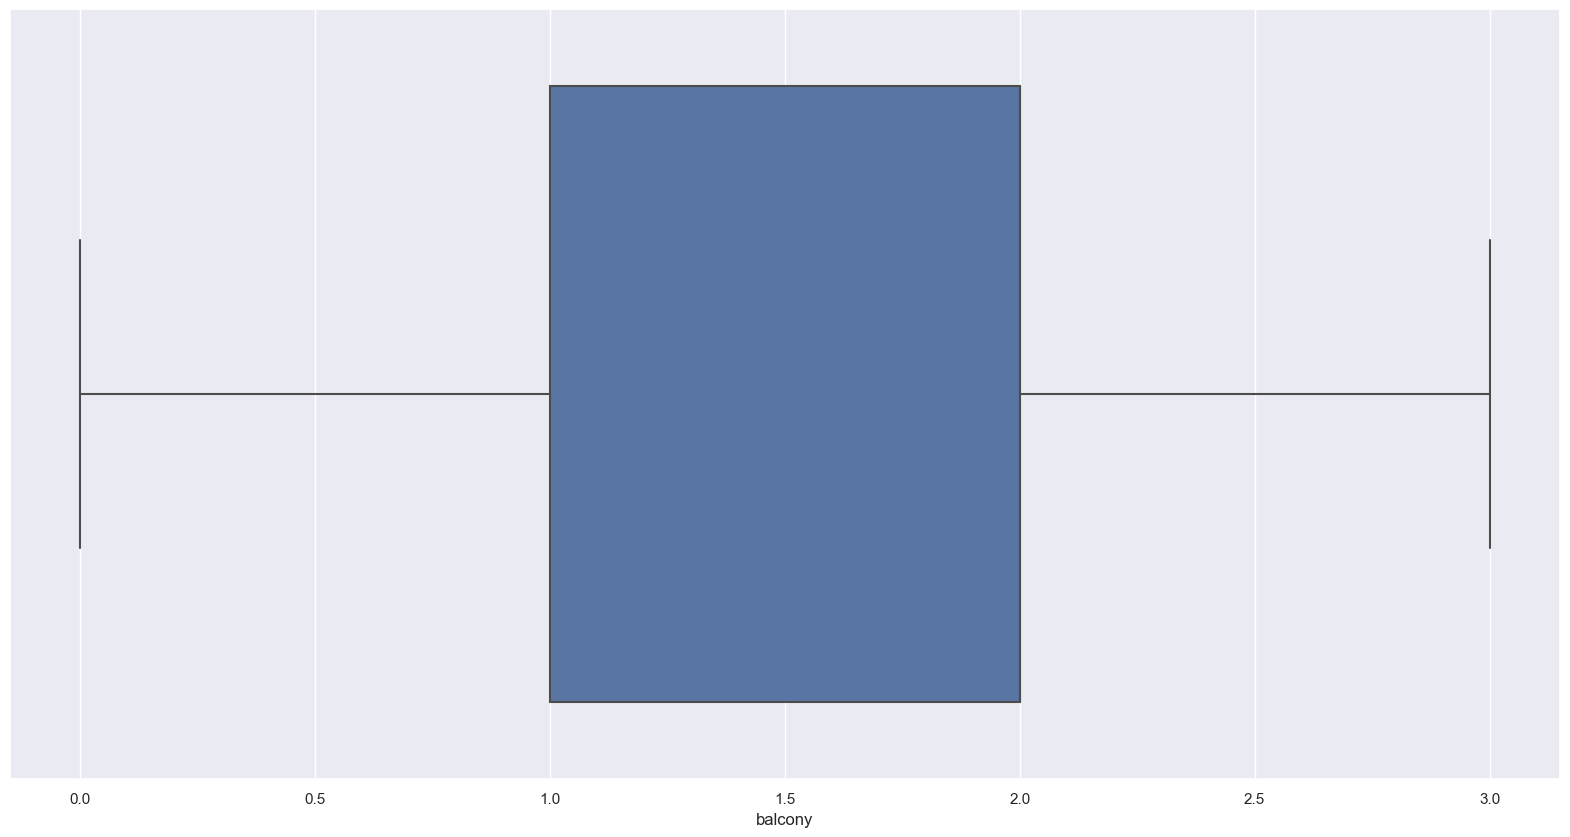

In [968]:
sns.boxplot(x='balcony', data=df51)


<Axes: xlabel='bath'>

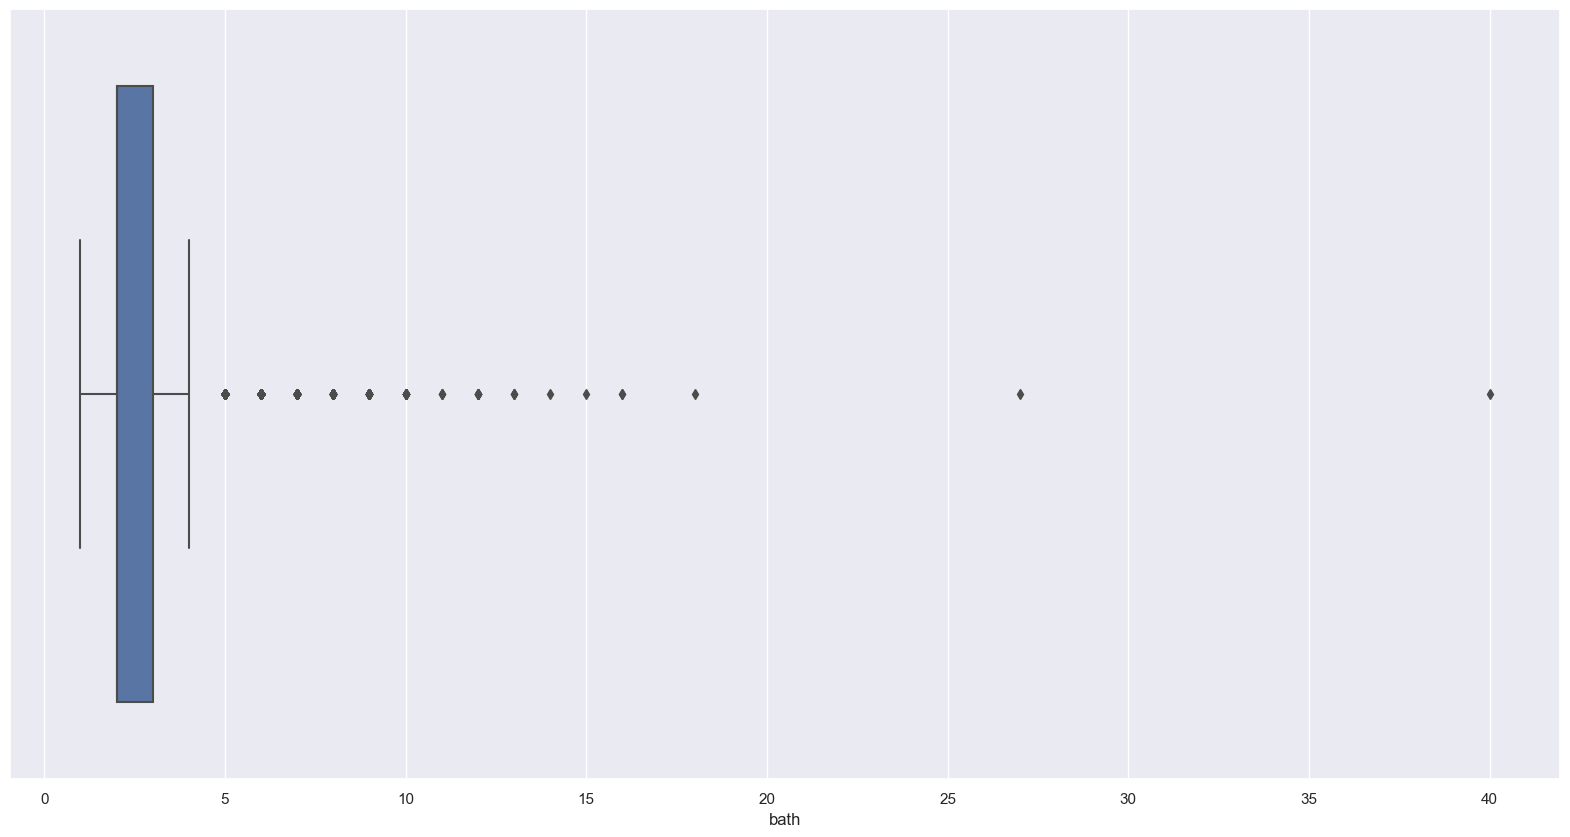

In [969]:
sns.boxplot(x='bath', data=df51)


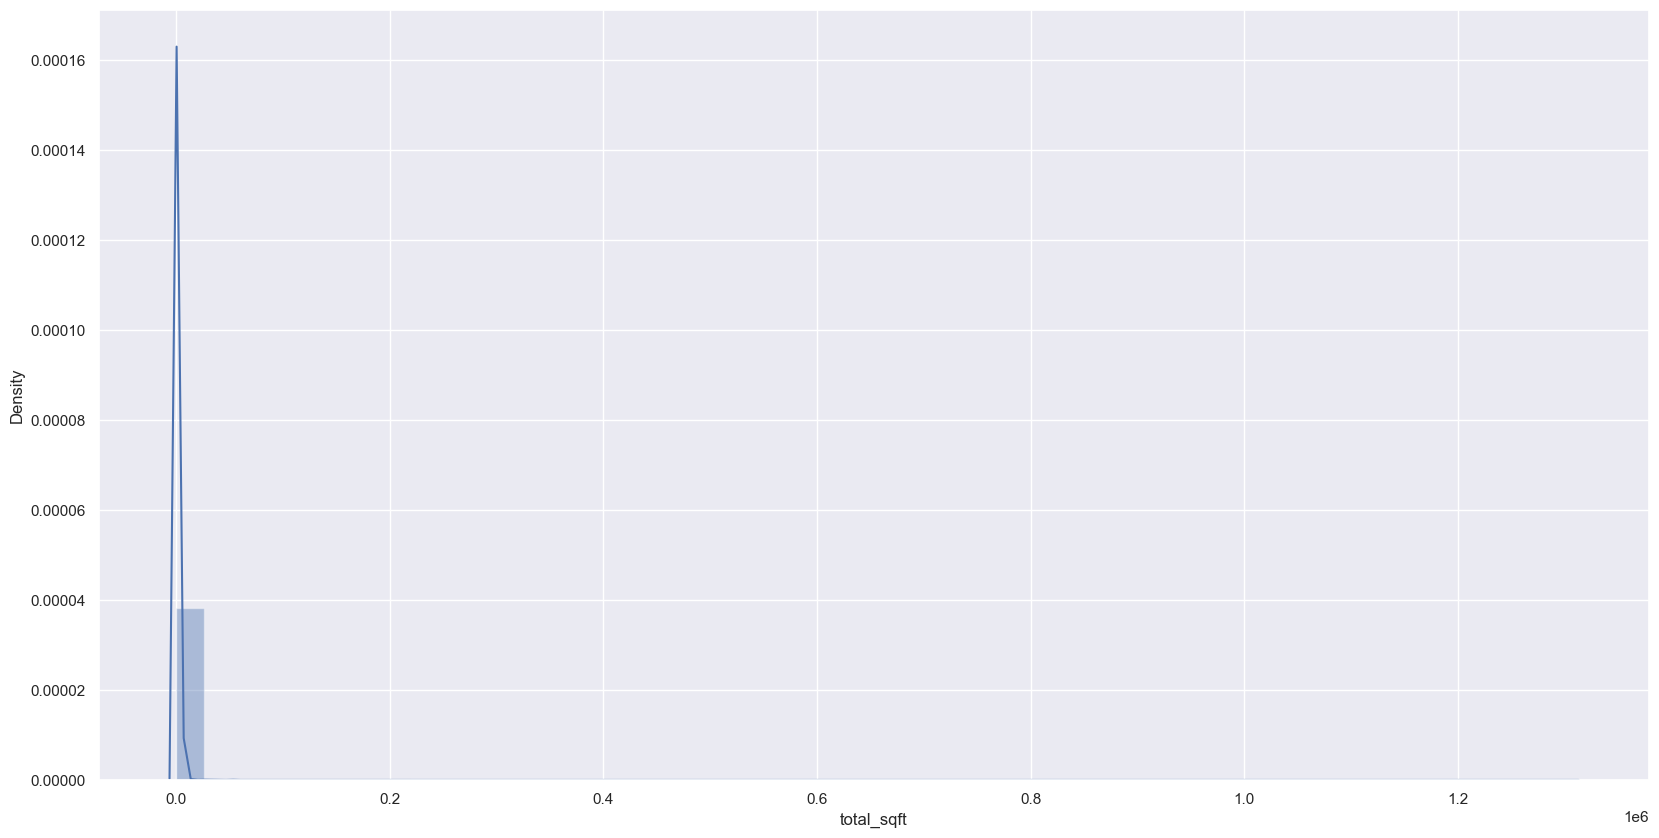

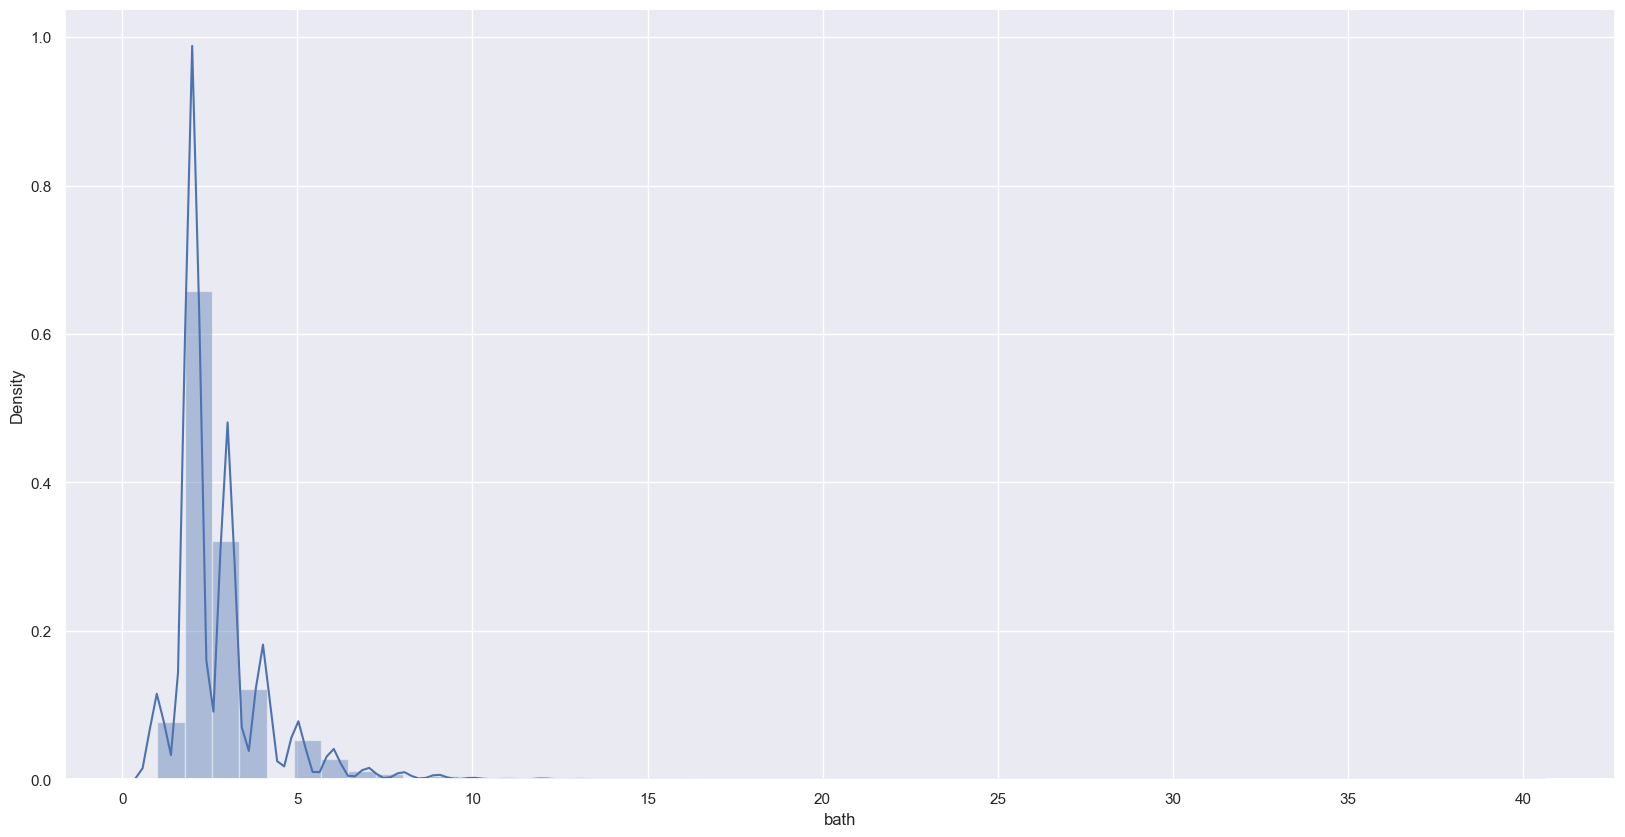

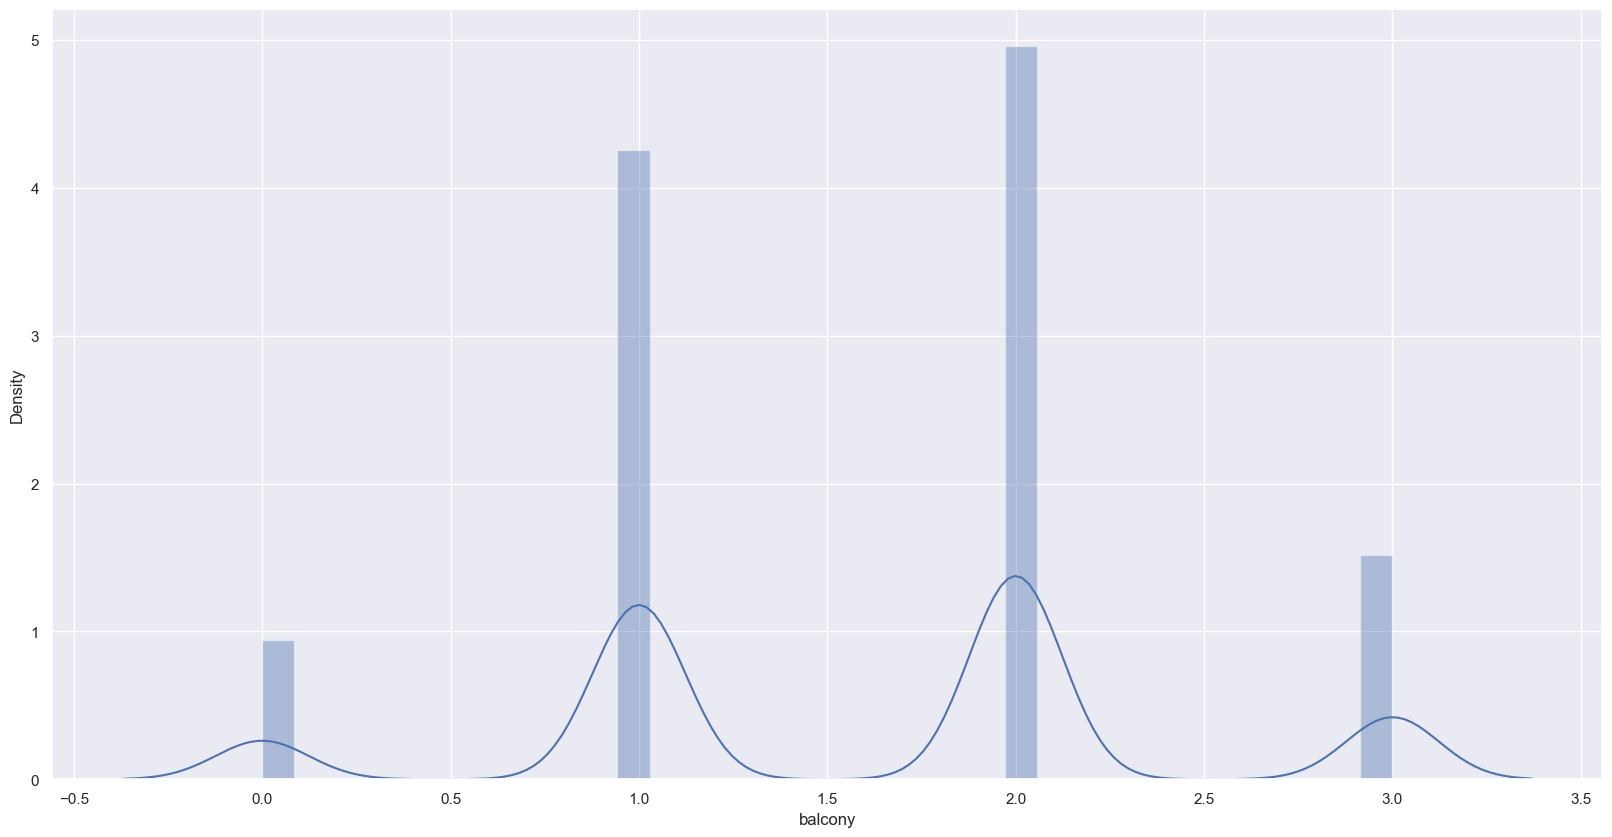

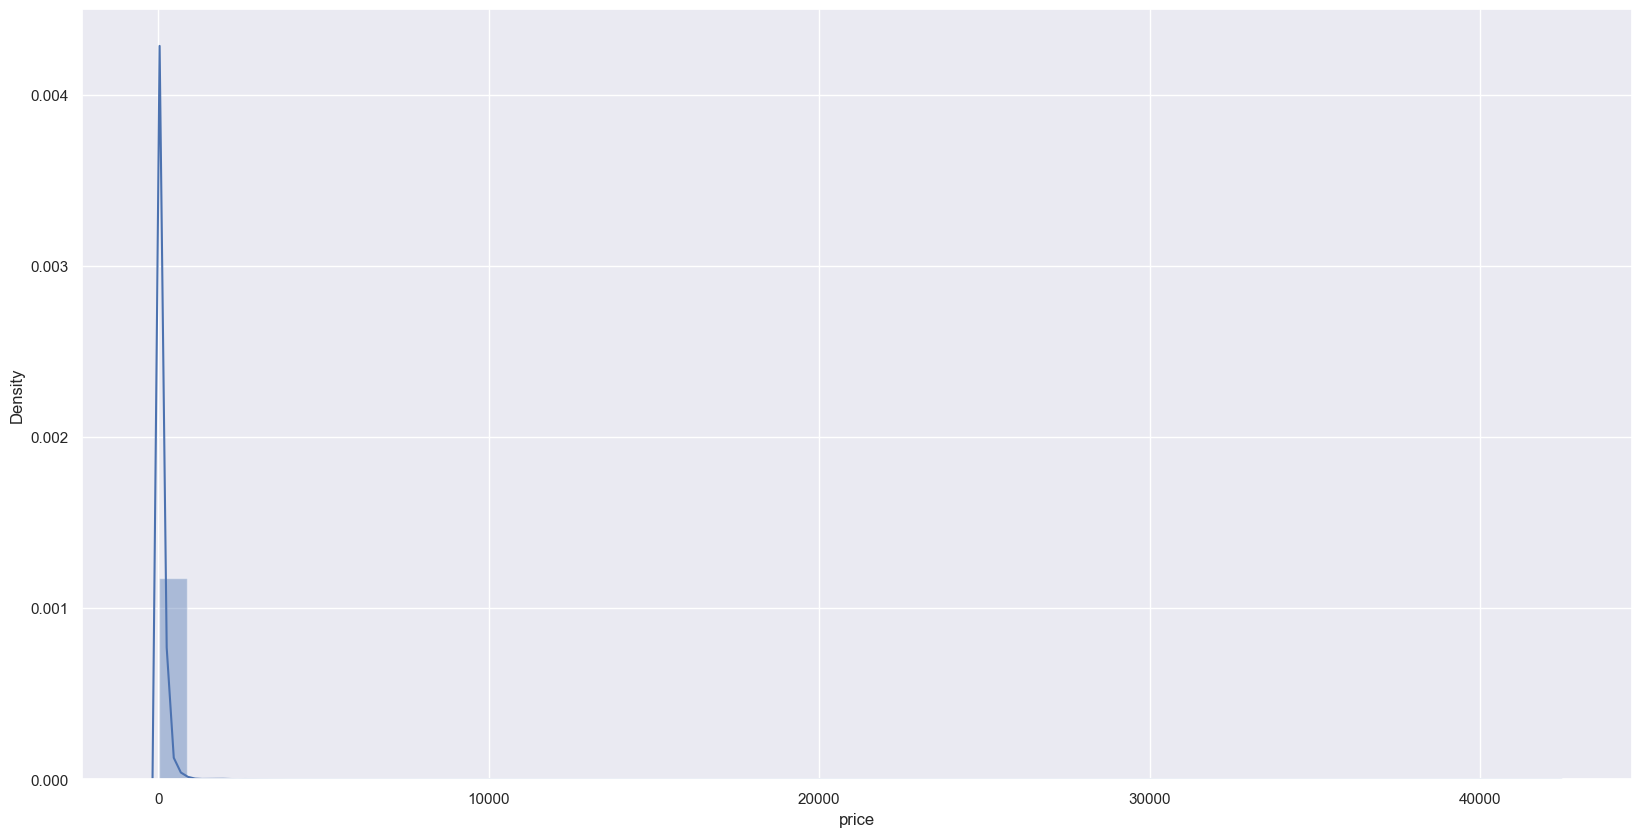

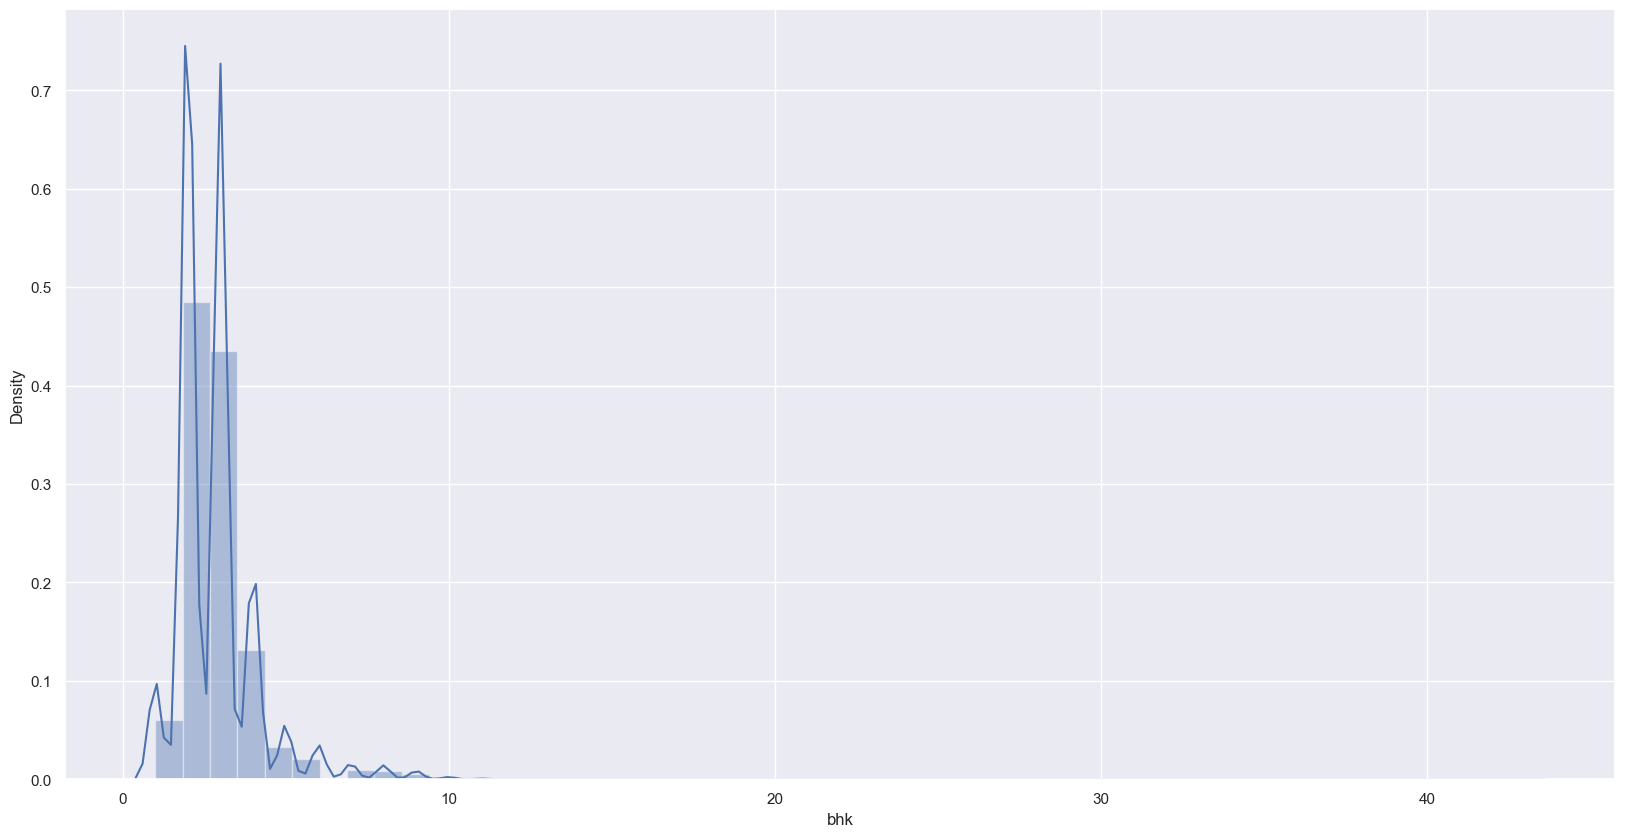

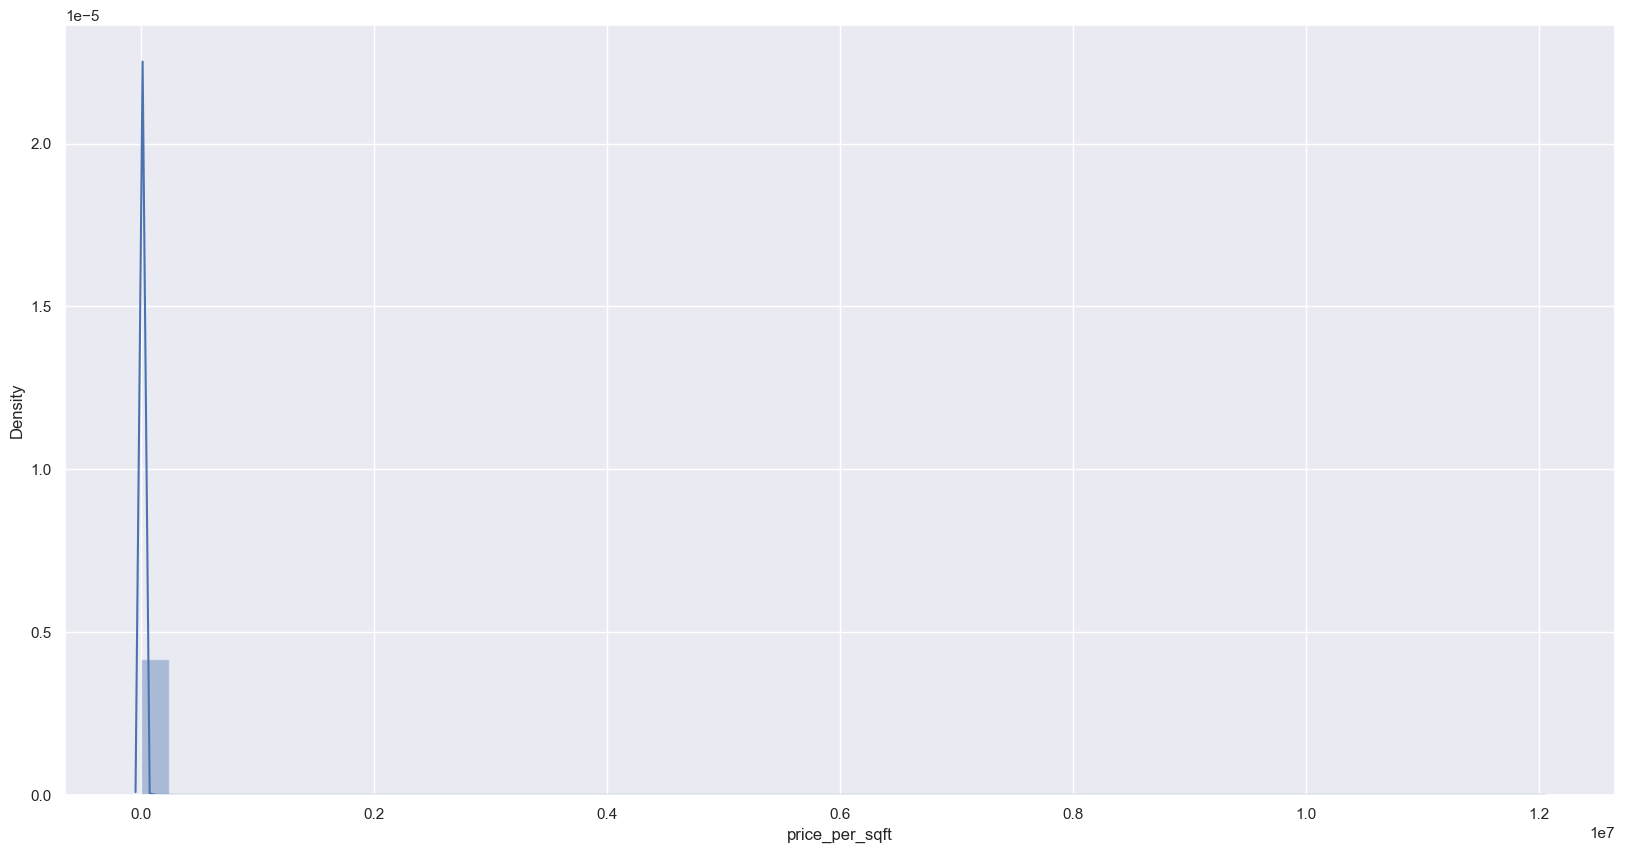

In [970]:
def distplots(col):
    sns.distplot(df51[col])
    plt.show()
    
for i in list(df51.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

In [971]:
df6= df51[~(df51['total_sqft']/df51['bhk']<300)]


In [972]:
df6.shape


(11677, 8)

<Axes: xlabel='price_per_sqft', ylabel='Density'>

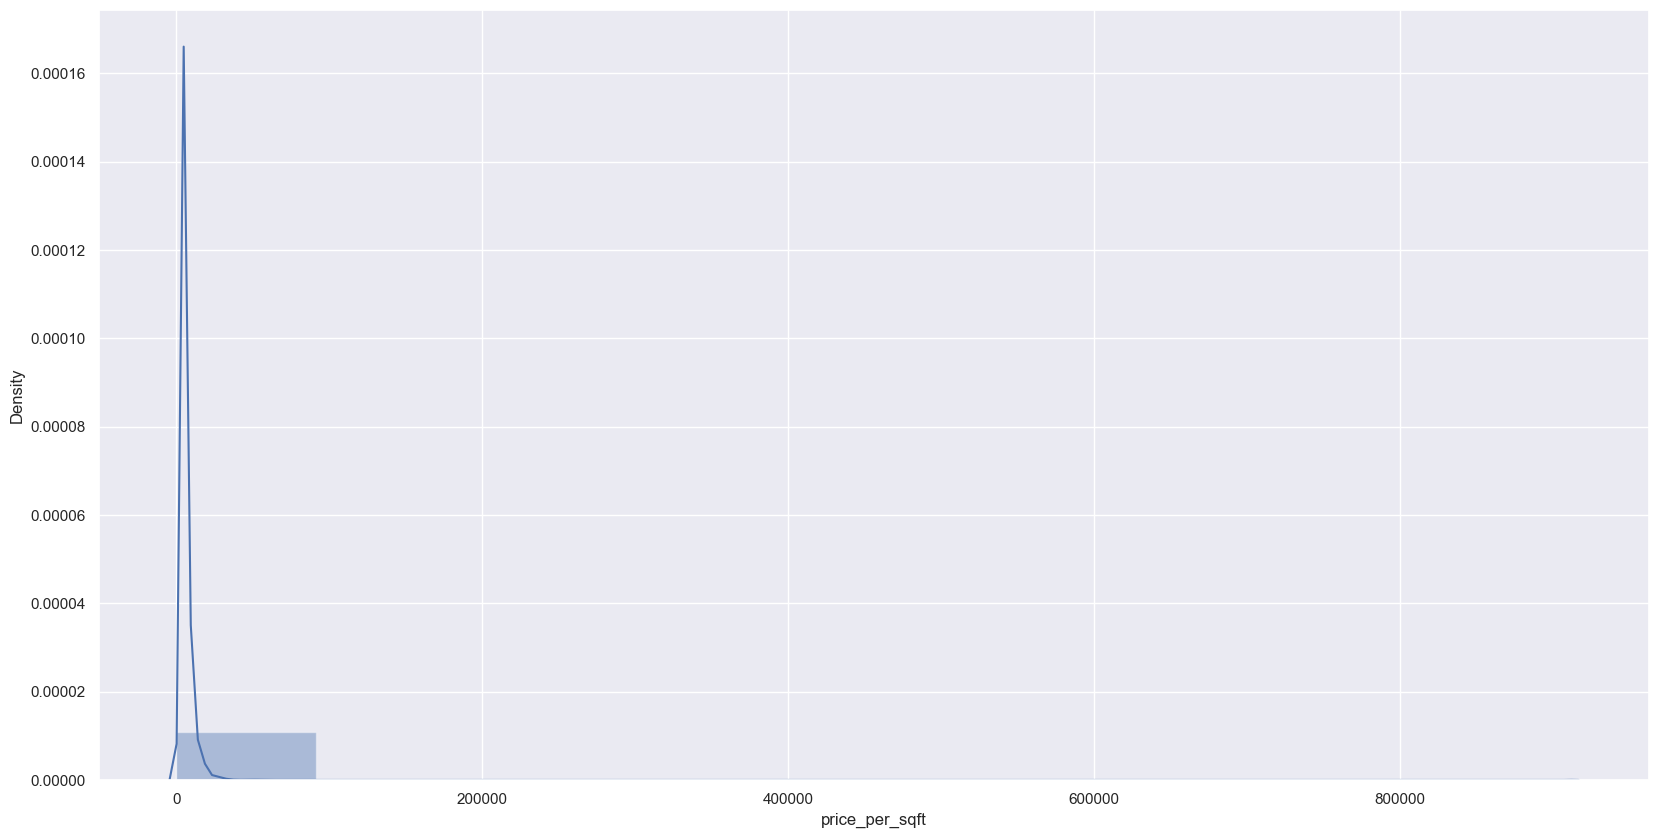

In [973]:
sns.distplot(df6['price_per_sqft'],bins=10,kde=True)


In [974]:
df6['price_per_sqft'].describe()


count     11677.000000
mean       6453.397994
std        9393.597917
min           2.257423
25%        4255.319149
50%        5347.985348
75%        6997.084548
max      912343.547691
Name: price_per_sqft, dtype: float64

In [975]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std= np.std(subdf['price_per_sqft'])
        reduce_df = subdf[(subdf['price_per_sqft']>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out



In [976]:
final_df = remove_pps_outliers(df6)

<Axes: xlabel='price_per_sqft'>

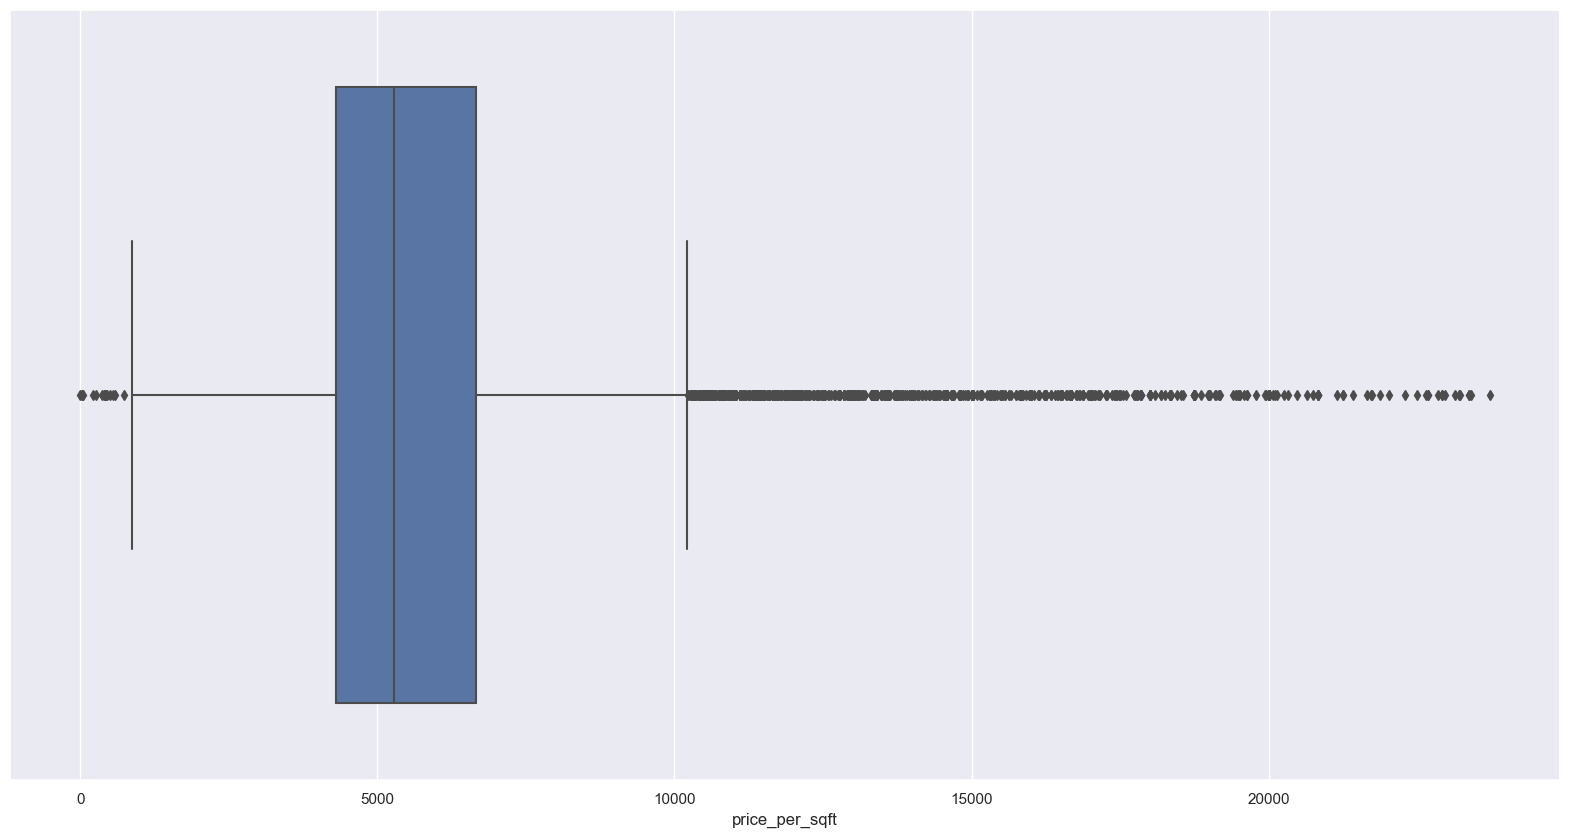

In [977]:
sns.boxplot(x='price_per_sqft', data=final_df)


In [978]:
final_df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667
2,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,2.0,85.0,5,5666.666667
3,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525
4,1st Phase JP Nagar,3 BHK,2024.0,3.0,2.0,157.0,3,7756.916996


In [979]:
final_df=final_df[~(final_df['total_sqft']>10000)]


In [980]:
final_df.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667
2,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,2.0,85.0,5,5666.666667
3,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525
4,1st Phase JP Nagar,3 BHK,2024.0,3.0,2.0,157.0,3,7756.916996


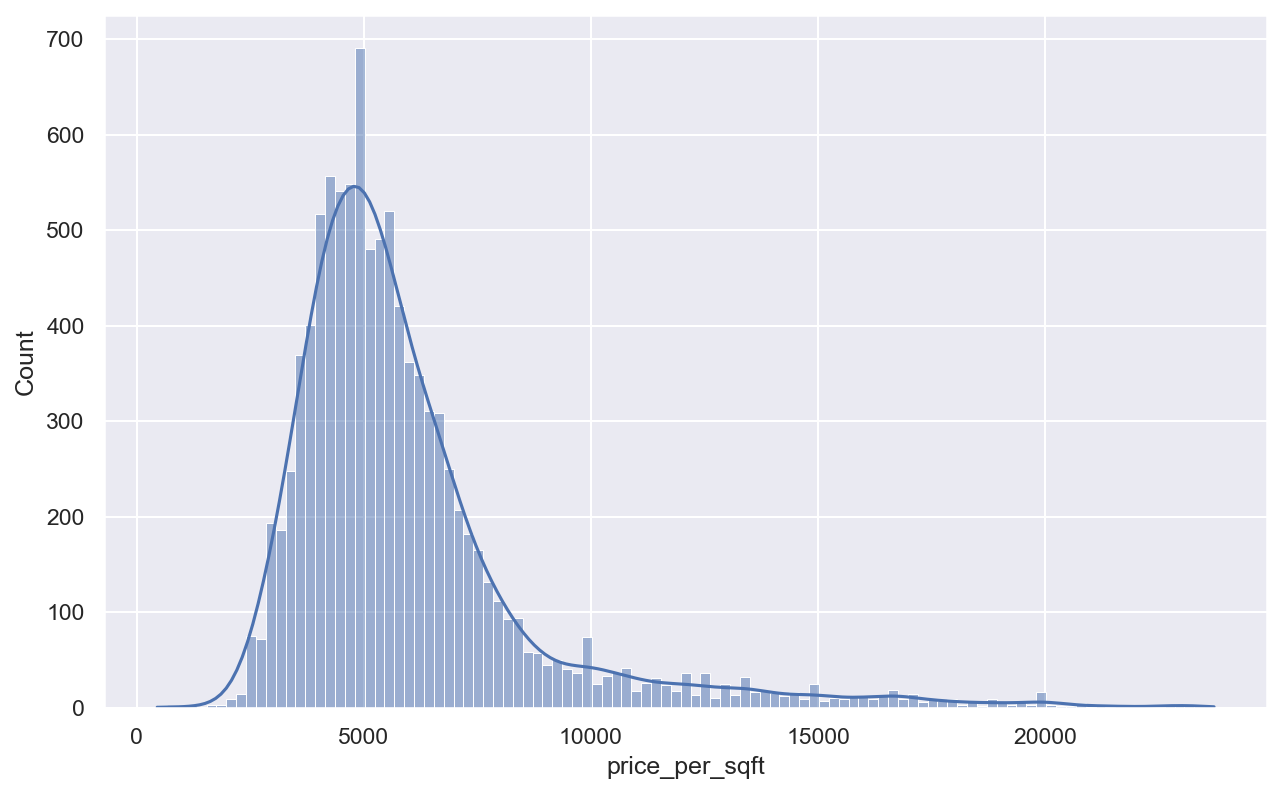

In [981]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(final_df['price_per_sqft'],kde=True);


In [982]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)


In [983]:
final_df1 = remove_pps_outliers(final_df)

<Axes: xlabel='bhk'>

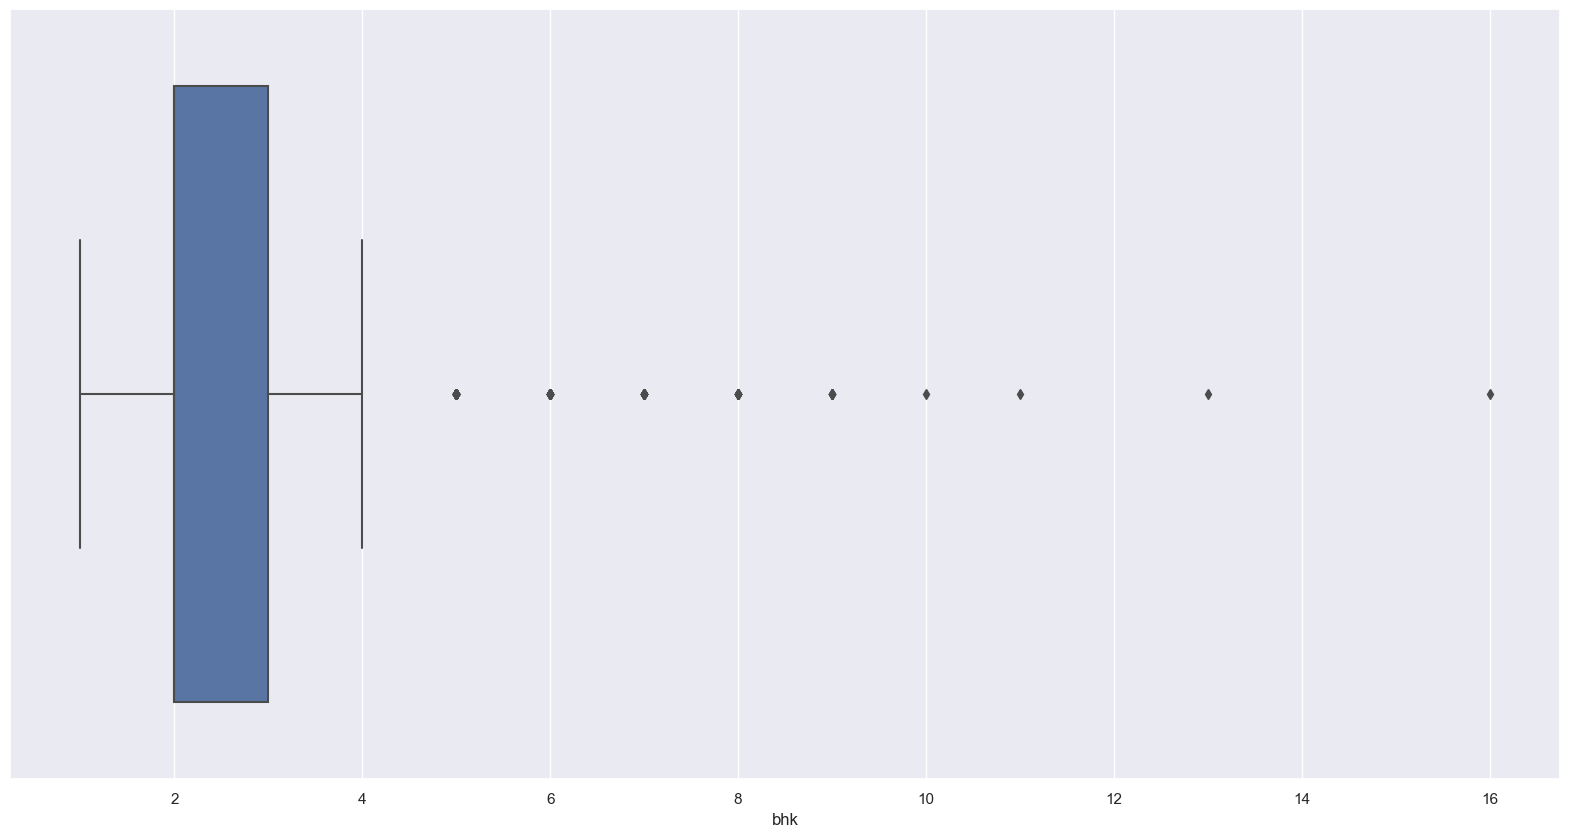

In [984]:
sns.boxplot(x='bhk', data=final_df1)


Text(0, 0.5, 'Count')

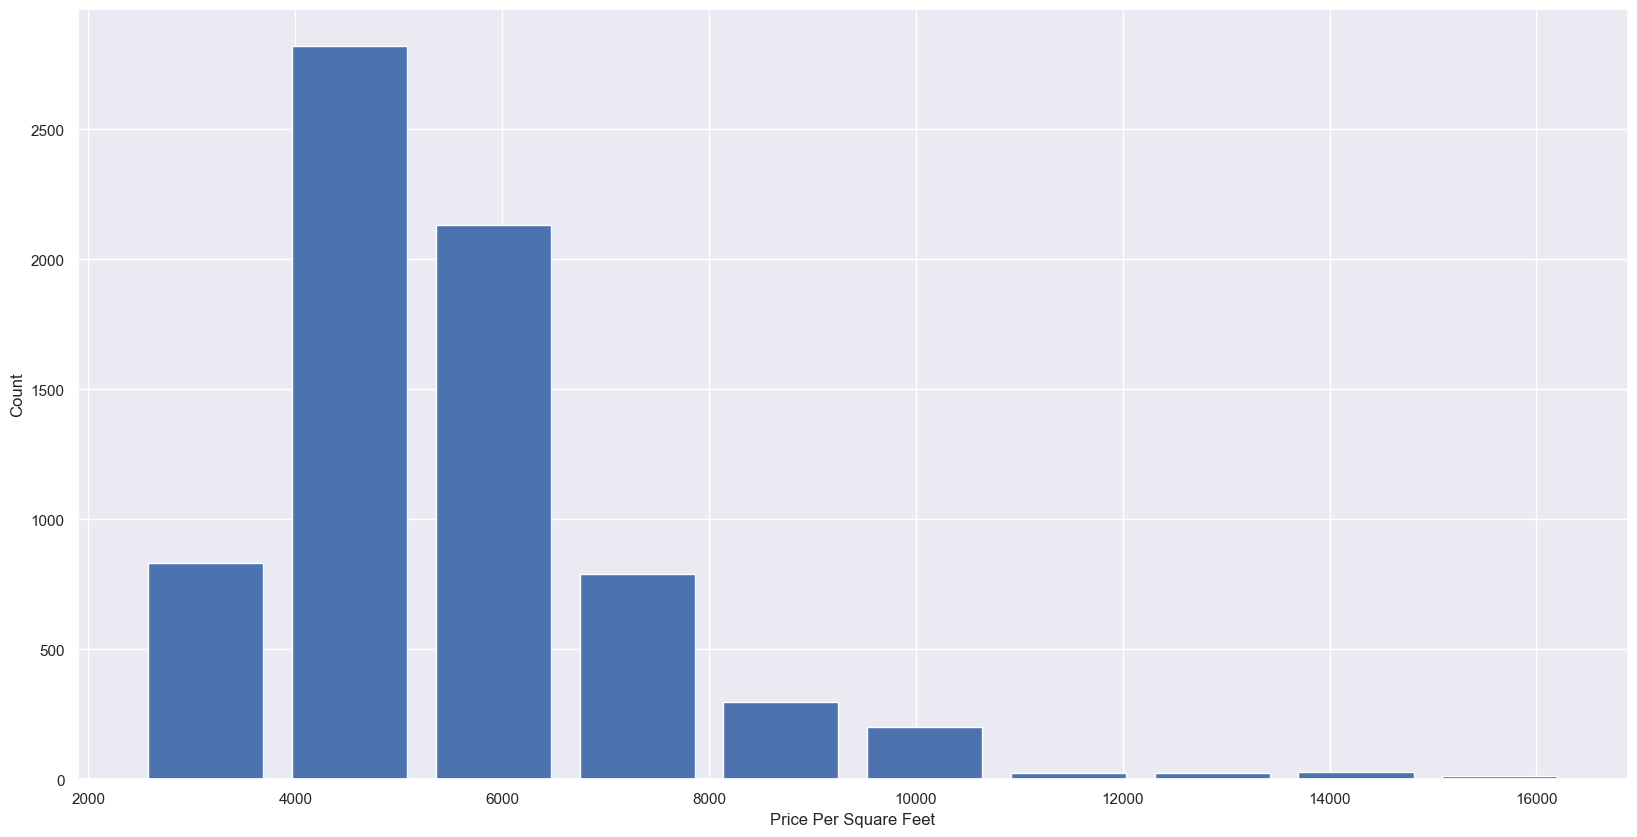

In [985]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(final_df1.price_per_sqft,rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')



In [986]:
final_df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,4,8849.557522
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667
2,1st Phase JP Nagar,3 BHK,2024.0,3.0,2.0,157.0,3,7756.916996
3,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2,7173.601148
4,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2,8635.097493


In [987]:
model_df = final_df1.drop('price_per_sqft',axis=1)

In [988]:
model_df

,location,size,total_sqft,bath,balcony,price,bhk
0,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.00,4
1,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.00,3
2,1st Phase JP Nagar,3 BHK,2024.0,3.0,2.0,157.00,3
3,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.00,2
4,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.00,2
...,...,...,...,...,...,...,...
7152,other,3 BHK,1440.0,2.0,2.0,63.93,3
7153,other,4 BHK,2200.0,3.0,3.0,80.00,4
7154,other,2 BHK,1015.0,2.0,2.0,60.00,2
7155,other,2 BHK,1075.0,2.0,2.0,48.00,2


In [989]:
final_df1[final_df1['bath']>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5099,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
6164,other,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
6453,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

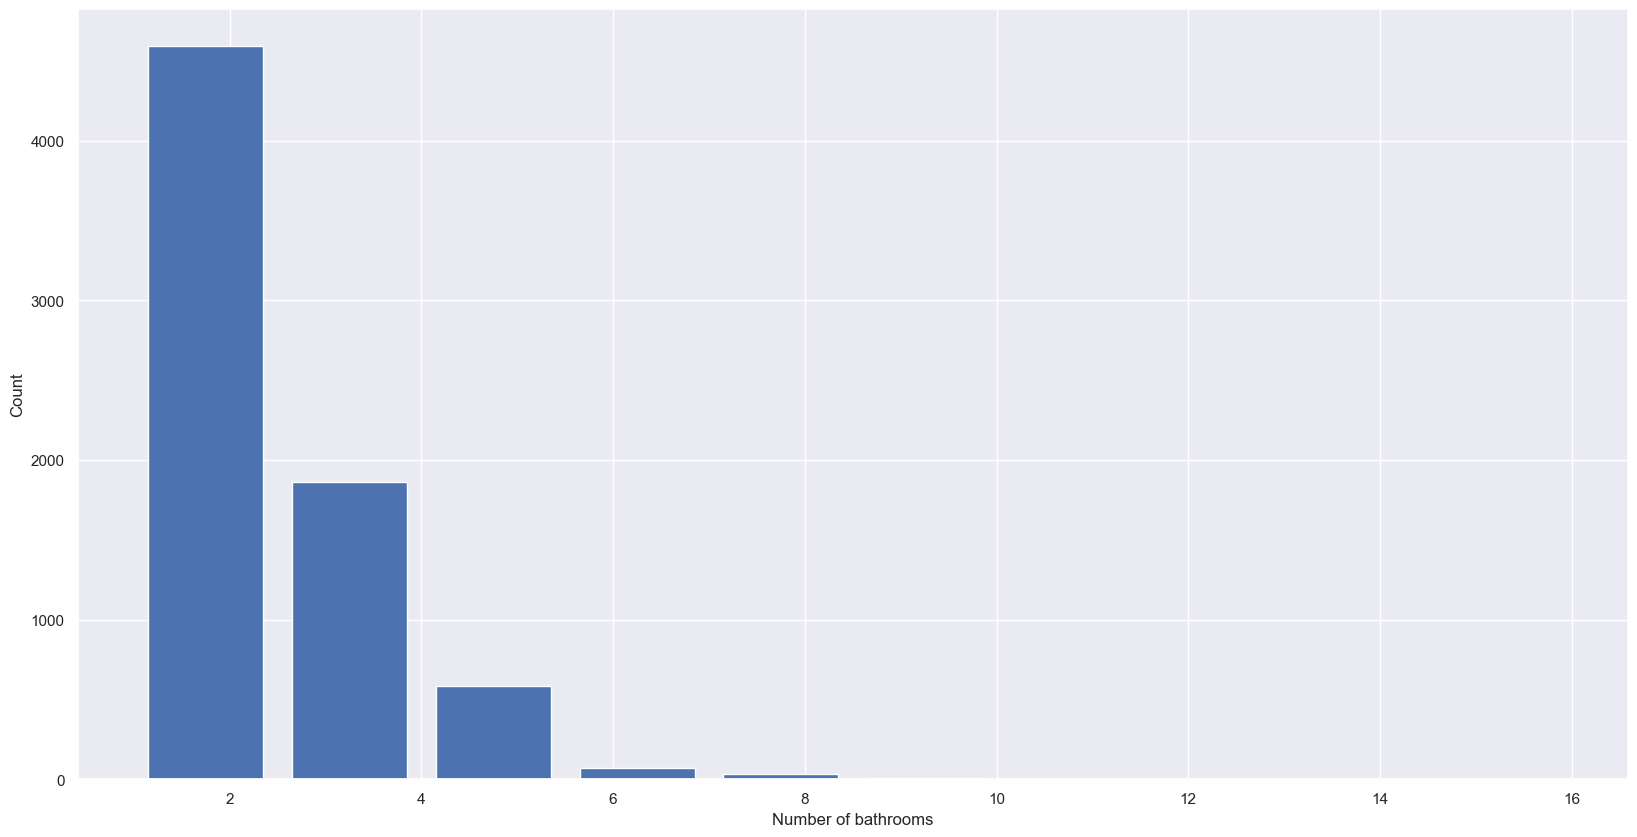

In [990]:
plt.hist(final_df1['bath'],rwidth=.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')



In [ ]:
#Encoding

In [991]:
model_df = final_df1.drop('price_per_sqft',axis=1)

In [992]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7157 non-null   object 
 1   size        7157 non-null   object 
 2   total_sqft  7157 non-null   float64
 3   bath        7157 non-null   float64
 4   balcony     7157 non-null   float64
 5   price       7157 non-null   float64
 6   bhk         7157 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 391.5+ KB


In [993]:
dummies = pd.get_dummies(model_df.location,drop_first=True)

In [994]:
main_df = pd.concat([model_df,dummies],axis=1)

In [995]:
heatmap_df=model_df.drop(['location','size'],axis=1)    
heatmap_df.head()

,total_sqft,bath,balcony,price,bhk
0,2825.0,4.0,3.0,250.0,4
1,1875.0,3.0,1.0,167.0,3
2,2024.0,3.0,2.0,157.0,3
3,1394.0,2.0,1.0,100.0,2
4,1077.0,2.0,2.0,93.0,2


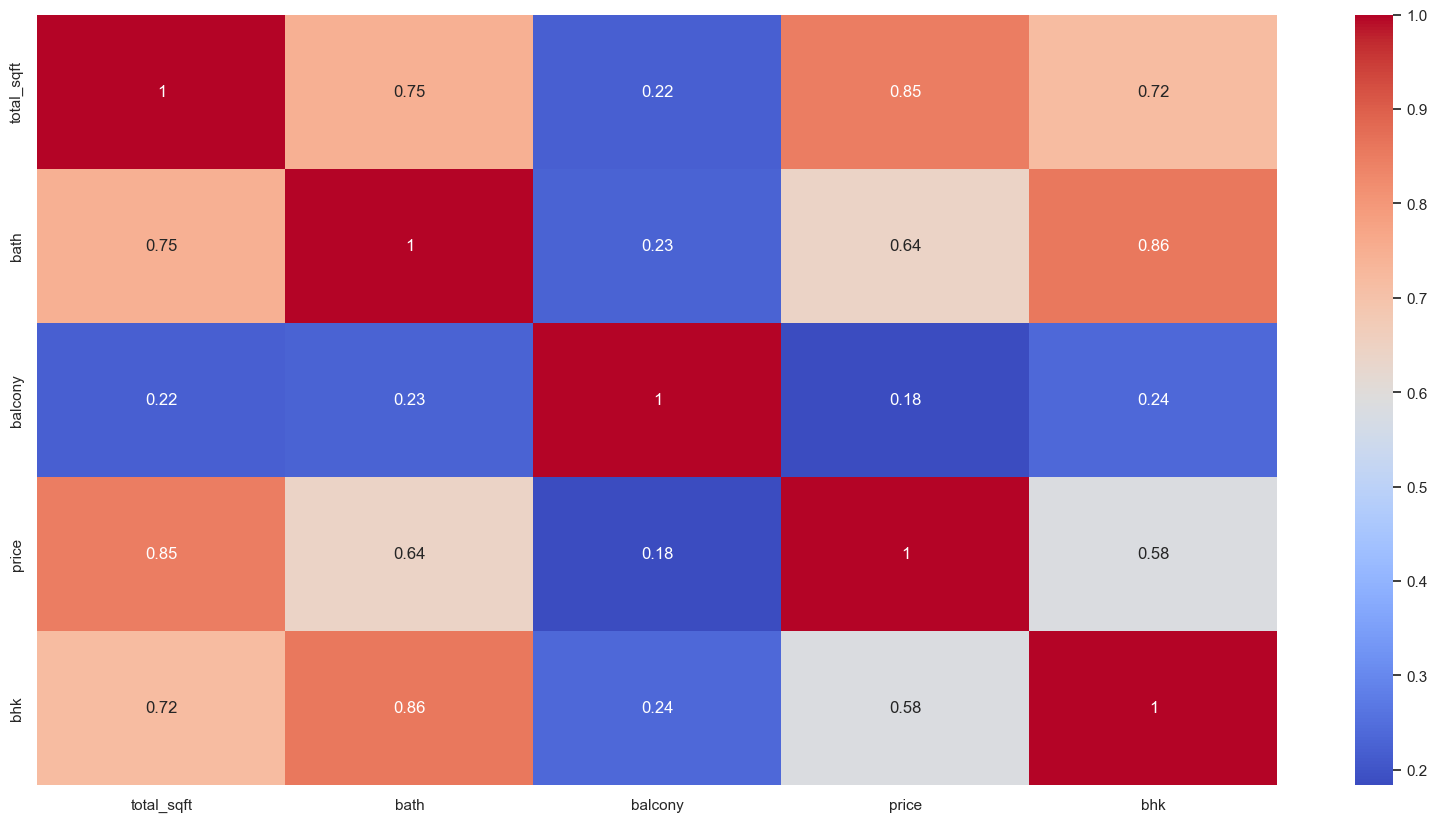

In [996]:
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [998]:
x = main_df.drop(['location','size','price'],axis=1)            

In [999]:
y=main_df['price']


In [ ]:
#Model Building

In [1000]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler = scaler.fit_transform(x)

In [1001]:
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.transform(x_test)


In [1002]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [1003]:
y_pred_train =lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [1004]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics

In [1026]:
print("LINEAR REGRESSION")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("R2 Score                : {:.4f}".format(r2_score(y_train,y_pred_train)))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_pred_test)))

LINEAR REGRESSION

Model performance for Training 
Root Mean Squared Error : 24.8191
Mean Absolute Error     : 14.5547
R2 Score                : 0.8391

Model performance for Test 
Root Mean Squared Error : 25.2446
Mean Absolute Error     : 15.0832
R2 Score                : 0.8334


In [1006]:
lasso = Lasso(alpha=0.1)
# alpha means lambda value and it's penalty
lasso.fit(x_train, y_train)


Lasso(alpha=0.1)

In [1007]:
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)


Ridge(alpha=0.3)

In [1008]:
#Ridge,Lasso

In [1009]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [1027]:
print("LASSO")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lasso))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_train, y_pred_train_lasso)))
print("R2 Score                : {:.4f}".format(r2_score(y_train,y_pred_train_lasso)))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_test_lasso)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_pred_test_lasso)))

LASSO

Model performance for Training 
Root Mean Squared Error : 27.0647
Mean Absolute Error     : 17.0827
R2 Score                : 0.8087

Model performance for Test 
Root Mean Squared Error : 27.1060
Mean Absolute Error     : 17.4705
R2 Score                : 0.8079


In [1028]:
print("RIDGE")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_ridge))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_train, y_pred_train_ridge)))
print("R2 Score                : {:.4f}".format(r2_score(y_train,y_pred_train_ridge)))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_test_ridge)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_pred_test_ridge)))

RIDGE

Model performance for Training 
Root Mean Squared Error : 24.8484
Mean Absolute Error     : 14.5675
R2 Score                : 0.8388

Model performance for Test 
Root Mean Squared Error : 25.2556
Mean Absolute Error     : 15.0816
R2 Score                : 0.8333


In [1029]:
LinearRegression_r2Score=r2_score(y_test, y_pred_test)

In [1014]:
from sklearn.tree import DecisionTreeRegressor

In [1015]:
model_dtree = DecisionTreeRegressor()
model_dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [1016]:
y_pred_train_df = model_dtree.predict(x_train)
y_pred_test_df = model_dtree.predict(x_test)

In [1017]:
print("DECISION TREE")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_df)))
print("Mean Absolute Error     : ",metrics.mean_absolute_error(y_train, y_pred_train_df))
print("R2 Score                : ",r2_score(y_train,y_pred_train_df))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_df))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_test_df)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_pred_test_df)))


DECISION TREE

Model performance for Training 
Root Mean Squared Error :  8.625900319742657
Mean Absolute Error     :  3.0577249152431154
R2 Score                :  0.9805684317267249

Model performance for Test 
Root Mean Squared Error : 33.6400
Mean Absolute Error     : 18.4231
R2 Score                : 0.7042


In [1018]:
DecisionTree_r2Score=r2_score(y_test,y_pred_test_df)

In [1019]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)


RandomForestRegressor()

In [1020]:
y_train_pred_rf=model_rf.predict(x_train)
y_test_pred_rf=model_rf.predict(x_test)

In [1021]:
print("RANDOM FOREST")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_train, y_train_pred_rf)))
print("R2 Score                : {:.4f}".format(r2_score(y_train,y_train_pred_rf)))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_test_pred_rf)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_test_pred_rf)))


RANDOM FOREST

Model performance for Training 
Root Mean Squared Error : 12.2832
Mean Absolute Error     : 7.1315
R2 Score                : 0.9606

Model performance for Test 
Root Mean Squared Error : 26.8139
Mean Absolute Error     : 15.4071
R2 Score                : 0.8120


In [1022]:
RandomForest_r2Score=r2_score(y_test,y_test_pred_rf)

In [1023]:
#RESULTS

In [1024]:
list1 = ["LINEAR REGRESSION","DECISION TREE","RANDOM FOREST"]
list2 = [ LinearRegression_r2Score,DecisionTree_r2Score,RandomForest_r2Score]
Result = pd.DataFrame({'MODEL':list1, "R2 SCORE":list2})
print(Result)

               MODEL  R2 SCORE
0  LINEAR REGRESSION  0.833401
1      DECISION TREE  0.704166
2      RANDOM FOREST  0.812044


Axes(0.125,0.11;0.775x0.77)


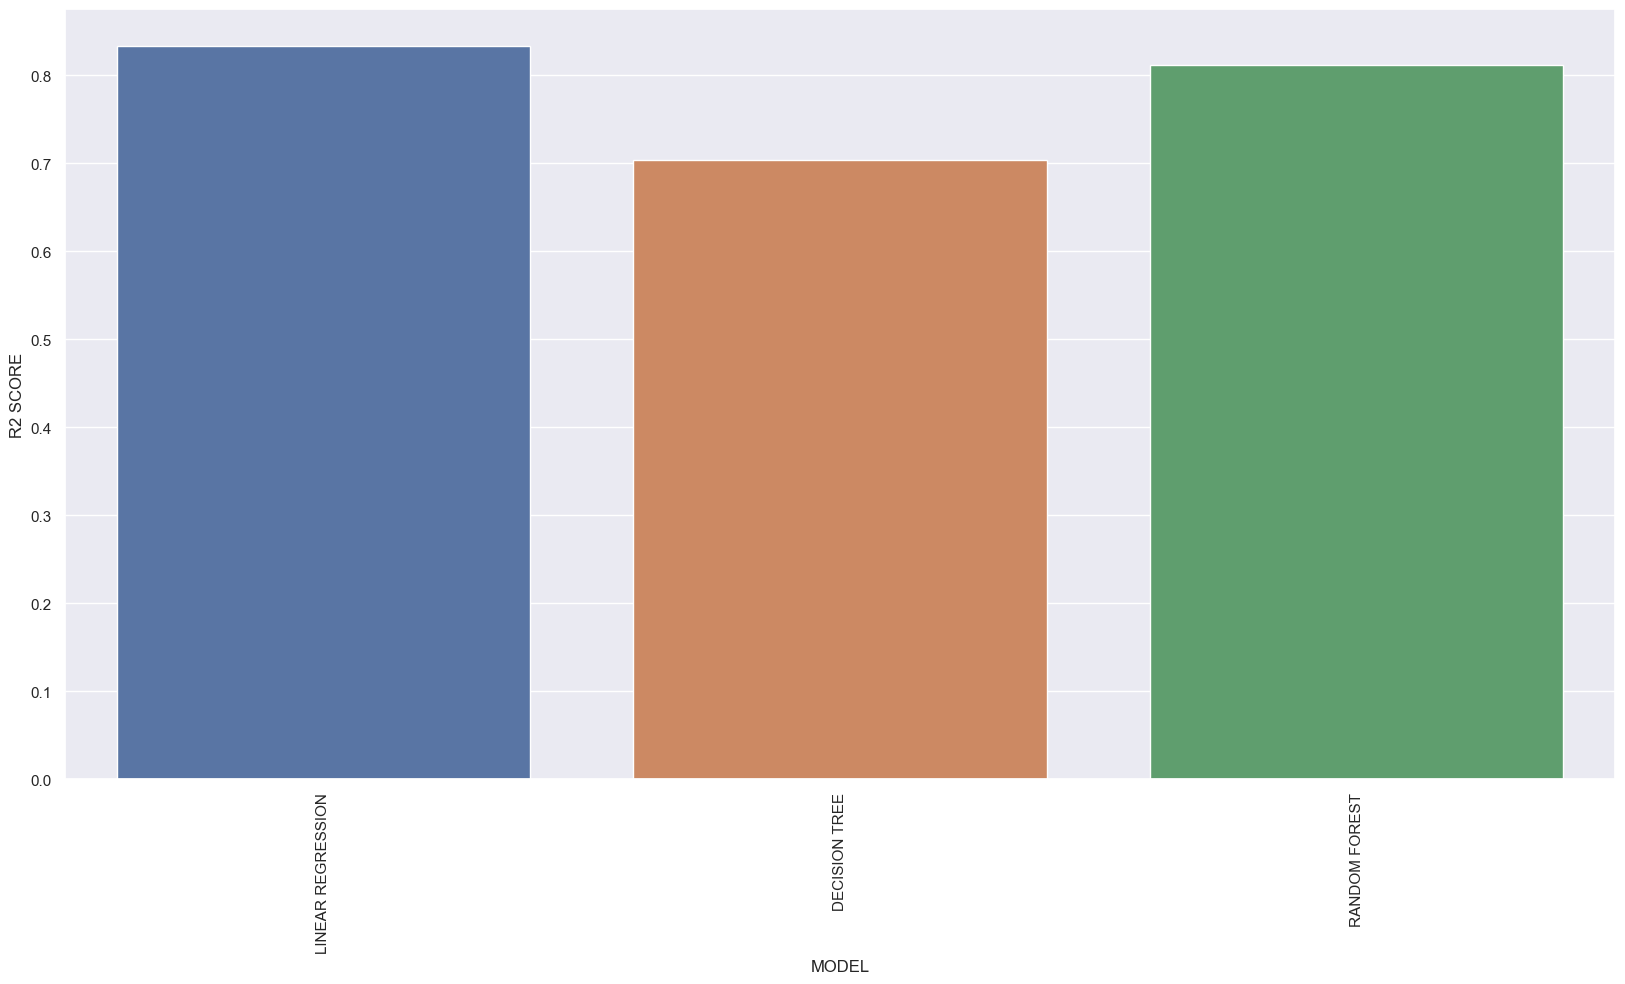

In [1025]:
chart = sns.barplot(x='MODEL', y='R2 SCORE', data= Result)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)